In [1]:
import numpy as np
import scvelo as scv
import torch
from umap import UMAP
from sklearn.decomposition import PCA
from scipy.stats import mannwhitneyu
import scanpy as sc
import pandas as pd
import os
import sys
import anndata as ad
from deepvelo.utils.scatter import scatter
from deepvelo.utils.preprocess import autoset_coeff_s
from deepvelo.utils.plot import statplot, compare_plot
from deepvelo import train, Constants
from deepvelo.utils import (
    velocity,
    velocity_confidence,
    continuity_confidence,
    update_dict,
    cross_boundary_correctness,
)


/home/liyr/miniconda3/envs/Deepvelo_GB/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using backend: pytorch
/home/liyr/miniconda3/envs/Deepvelo_GB/lib/python3.8/site-packages/deepvelo/utils/scatter.py:5: DeprecationWarning: deepvelo.utils.scatter is deprecated. Please use deepvelo.plot.scatter instead.
  warnings.warn(
/home/liyr/miniconda3/envs/Deepvelo_GB/lib/python3.8/site-packages/deepvelo/utils/plot.py:5: DeprecationWarning: deepvelo.utils.plot is deprecated. Please use deepvelo.plot.plot instead.
  warnings.warn(


In [2]:
import cellrank as cr

scv.settings.verbosity = 3
scv.settings.set_figure_params("scvelo")
cr.settings.verbosity = 2

In [3]:
adata = scv.read("/home/liyr/hpz/real_data_graph/Forebrain/DeepVelo_GB.h5ad")
adata
#scv.pl.velocity_embedding_stream(adata2, color= "clusters", dpi=100, title='')

AnnData object with n_obs × n_vars = 1720 × 2000
    obs: 'clusters', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'gene_count_corr', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'velocity_gamma', 'velocity_r2', 'velocity_genes'
    uns: 'clusters_colors', 'neighbors', 'pca', 'velocity_graph', 'velocity_graph_neg', 'velocity_params'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    varm: 'PCs'
    layers: 'Ms', 'Mu', 'ambiguous', 'cell_specific_alpha', 'cell_specific_beta', 'cell_specific_gamma', 'matrix', 'spliced', 'unspliced', 'variance_velocity', 'velocity', 'velocity_unspliced'
    obsp: 'connectivities', 'distances'

Computing transition matrix based on logits using `'deterministic'` mode


/tmp/ipykernel_10436/4169397343.py:1: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.transition_matrix(adata)


Estimating `softmax_scale` using `'deterministic'` mode


100%|██████████| 1720/1720 [00:00<00:00, 1816.53cell/s]

Setting `softmax_scale=8.4448`



100%|██████████| 1720/1720 [00:00<00:00, 2045.16cell/s]


    Finish (0:00:02)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`
    Finish (0:00:00)
Accessing `adata.obsp['T_bwd']`


/tmp/ipykernel_10436/4169397343.py:2: DeprecationWarning: `cellrank.tl.initial_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.initial_states(adata)
/home/liyr/miniconda3/envs/Deepvelo_GB/lib/python3.8/site-packages/cellrank/tl/_init_term_states.py:156: DeprecationWarning: `cellrank.tl.transition_matrix` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  kernel = transition_matrix(


Computing transition matrix based on logits using `'deterministic'` mode
Estimating `softmax_scale` using `'deterministic'` mode


100%|██████████| 1720/1720 [00:01<00:00, 1602.73cell/s]


Setting `softmax_scale=8.4448`


100%|██████████| 1720/1720 [00:01<00:00, 1593.95cell/s]

    Finish (0:00:02)
Using a connectivity kernel with weight `0.2`
Computing transition matrix based on `adata.obsp['connectivities']`


    Finish (0:00:00)
Found categorical observation in `adata.obs['clusters']`. Consider specifying it as `cluster_key`.
Computing eigendecomposition of the transition matrix
Adding `adata.uns['eigendecomposition_bwd']`
       `.eigendecomposition`
    Finish (0:00:00)
For 1 macrostate, stationary distribution is computed
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['initial_states']`
       `adata.obs['initial_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`
Accessing `adata.obsp['T_fwd']`
Using precomputed transition matrix
Found categorical observation in `adata.obs['clusters']`. Consider specifying it as `cluster_key`.
Computing eigendecomposition of the transition matrix
Adding `ada

/tmp/ipykernel_10436/4169397343.py:3: DeprecationWarning: `cellrank.tl.terminal_states` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.terminal_states(adata)


Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)
Computing `3` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Adding `adata.obs['terminal_states']`
       `adata.obs['terminal_states_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`
Computing absorption probabilities
Defaulting to `'gmres'` solver.


/tmp/ipykernel_10436/4169397343.py:4: DeprecationWarning: `cellrank.tl.lineages` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  cr.tl.lineages(adata)
100%|██████████| 3/3 [00:00<00:00, 65.18/s]

Adding `adata.obsm['to_terminal_states']`
       `.absorption_probabilities`
    Finish (0:00:00)


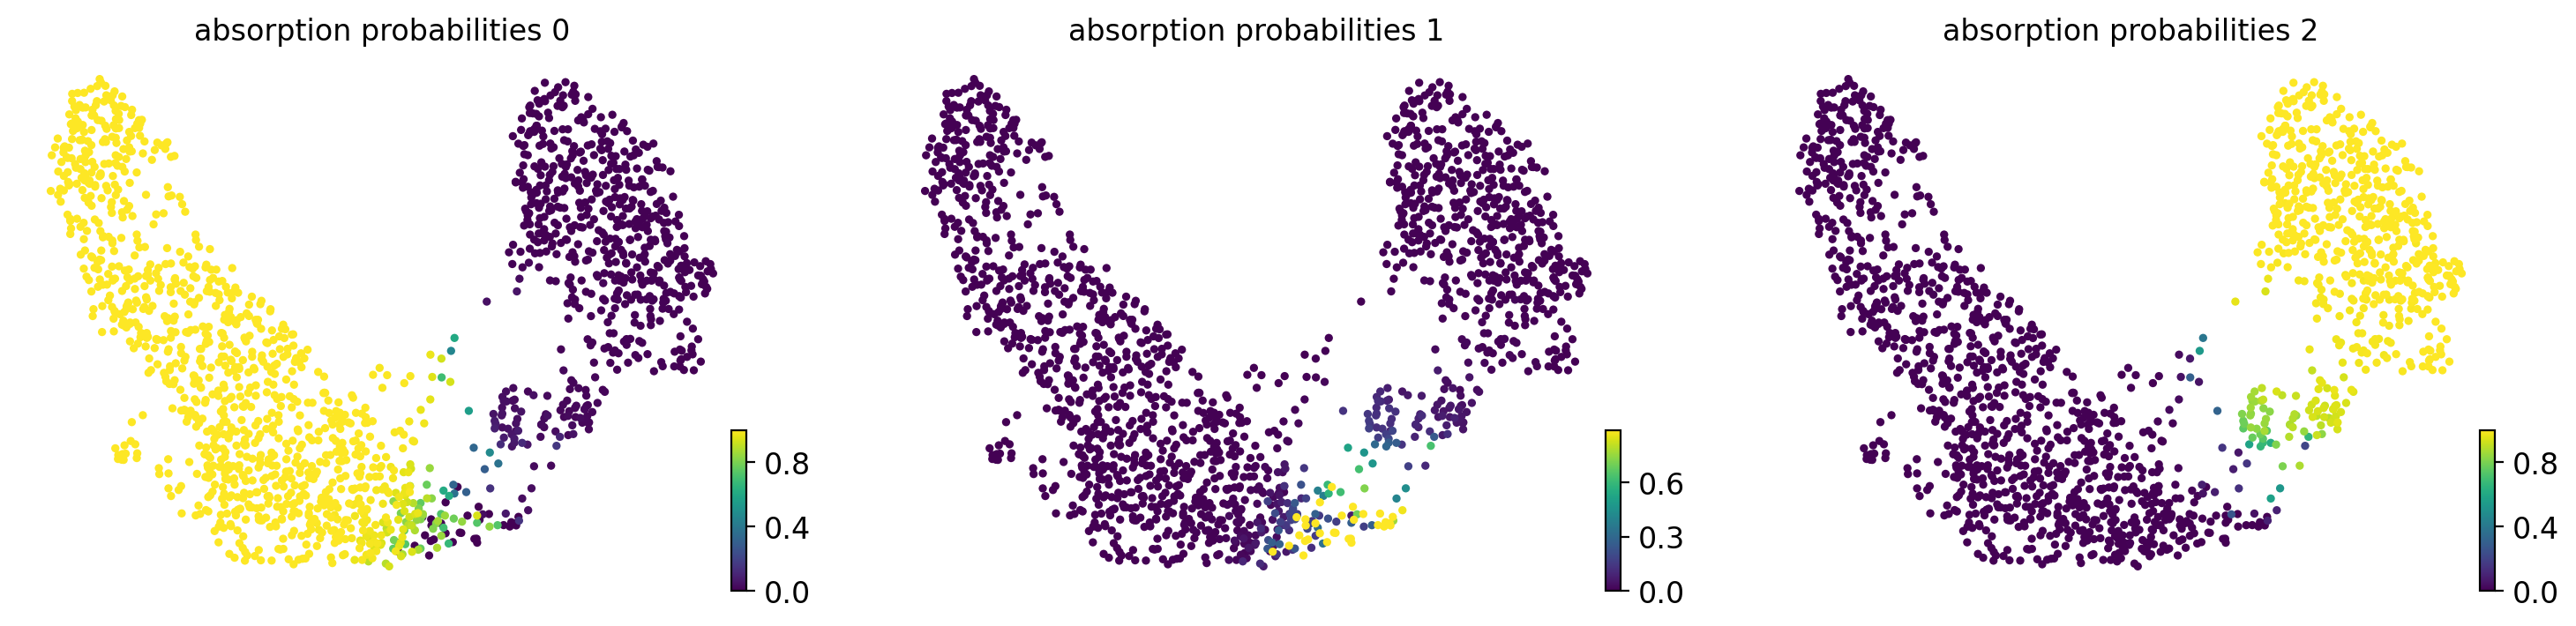

In [4]:
cr.tl.transition_matrix(adata)
cr.tl.initial_states(adata)
cr.tl.terminal_states(adata)
cr.tl.lineages(adata)
cr.pl.lineages(adata, same_plot=False)

In [5]:
driver_genes_df = cr.tl.lineage_drivers(adata)
driver_genes_df.head()

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


/tmp/ipykernel_10436/9136726.py:1: DeprecationWarning: `cellrank.tl.lineage_drivers` will be removed in version `2.0`. Please use the `cellrank.kernels` or `cellrank.estimators` interface instead.
  driver_genes_df = cr.tl.lineage_drivers(adata)


,0_corr,0_pval,0_qval,0_ci_low,0_ci_high,1_corr,1_pval,1_qval,1_ci_low,1_ci_high,2_corr,2_pval,2_qval,2_ci_low,2_ci_high
Gene,,,,,,,,,,,,,,,
STMN2,0.942699,0.0,0.0,0.937192,0.947736,-0.115987,1.380037e-06,1.725257e-05,-0.162362,-0.069101,-0.922601,0.0,0.0,-0.929340,-0.915247
NEUROD2,0.912684,0.0,0.0,0.904434,0.920251,-0.103682,1.619871e-05,1.636234e-04,-0.150211,-0.056695,-0.895942,0.0,0.0,-0.904888,-0.886205
NEUROD6,0.890331,0.0,0.0,0.880102,0.899734,0.038858,1.071908e-01,2.167661e-01,-0.008423,0.085965,-0.918159,0.0,0.0,-0.925271,-0.910403
RTN1,0.826912,0.0,0.0,0.811358,0.841296,-0.242558,1.121796e-24,1.495728e-22,-0.286538,-0.197558,-0.764865,0.0,0.0,-0.783795,-0.744516
TMSB10,0.815113,0.0,0.0,0.798616,0.830386,0.070499,3.432443e-03,1.501476e-02,0.023312,0.117373,-0.851605,0.0,0.0,-0.864089,-0.838073


In [6]:
driver_genes_df.to_csv("/home/liyr/zxc/top_like_genes/res/DeepVelo_GCN.csv")